# Announcements

- Exercise solutions will be shared at the end of the semester
- Initial Self-Reflection \#4
- Quick runthrough of Codespaces and GitHub
- Commit early and often!

# pandas Basics

In this lesson, we're going to introduce some of the basics of [pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html) (notice the lowercase), a powerful Python library for working with tabular data like CSV files.

In [ ]:
import pandas as pd
# importing pandas as pd helps to keep the code concise and work with large datasets efficiently
import numpy as np

pd.options.display.max_rows = 100  # default is 60 rows

## Data: The Bellevue Almshouse Dataset

> Nineteenth-century immigration data was produced with the express purpose of reducing people to bodies; bodies to easily quantifiable aspects; and assigning value to those aspects which proved that the marginalized people to who they belonged were worth less than their elite counterparts.

-Anelise Shrout, ["(Re)Humanizing Data"](https://crdh.rrchnm.org/essays/v01-10-(re)-humanizing-data/)

The dataset that we're working with in this lesson is the [Bellevue Almshouse Dataset](https://www.nyuirish.net/almshouse/the-almshouse-records/), curated by historian and DH scholar Anelise Shrout. It includes information about Irish-born immigrants who were admitted to New York City's Bellevue Almshouse in the 1840s.

> <font color='gray'>_**H501 Note: Inactive Link to Dataset**. You may notice that the above link to the dataset is not working ... with a bit of digging, the best I can find on this dataset now is on [Ancestry UK](https://www.ancestry.co.uk/search/collections/62048/), which references [municipal records](https://www.nyc.gov/assets/records/pdf/Almshouse_REC0008_MASTER.pdf) and the [NYC Archives](https://www.archives.nyc/almshouse). Unfortunately, none of these references have any documentation on the data itself (e.g., what each column "means"). **Never draw conclusions from found data without documentation.** This notebook illustrates a few reasons why._</font>

The Bellevue Almshouse was part of New York City's public health system, a place where poor, sick, homeless, and otherwise marginalized people were sent — sometimes voluntarily and sometimes forcibly. Devastated by widespread famine in Ireland, many Irish people fled their homes for New York City in the 1840s, and many of them ended up in the Bellevue Almshouse.

We're using the [Bellevue Almshouse Dataset](https://www.nyuirish.net/almshouse/the-almshouse-records/) to practice data analysis with pandas because we want to think deeply about the consequences of reducing human life to data. As Shrout argues in [her essay](https://crdh.rrchnm.org/essays/v01-10-(re)-humanizing-data/), this data purposely reduced people to bodies and "easily quantifiable aspects" in order to devalue their lives, potentially enacting "both epistemic and physical violence" on them.

We want to think about how responsible data analysis requires more than just technical tools like pandas. It also requires an interrogation of the data. Who collected this data? How and why was this data collected? What assumptions are present in this data? What are the consequences of this data in the world? What does this data reflect about the world? For example, Shrout claims that the "Bellevue administrators framed any ailments or difficulties inmates might have had as a consequence of their immigration status" — perhaps best exemplified by the fact that a frequent "disease" in the dataset is "recent emigrant." Below we're going to explore the prevalence of "recent emigrant" in the data as well as other salient patterns.

### Read in CSV File

To read in a CSV file, we will use the function `pd.read_csv()` and insert the name of our desired file path. 

In [ ]:
url = 'https://github.com/melaniewalsh/Intro-Cultural-Analytics/raw/master/book/data/bellevue_almshouse_modified.csv'

df_bellevue = pd.read_csv(url)
# df_bellevue = pd.read_csv('./data/.../mydata.csv')  # you can also reference locally stored data

This creates a pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe) — typically abbreviated as `df`. We want to have descriptive variable names, so we add a suffix `df_bellevue`. A DataFrame looks and acts a lot like a spreadsheet, but it is a Python class with attributes and methods which we will discuss here.

Place your cursor inside the parentheses for [`pd.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html), and type **Shift + Tab** to peek the different argument options available. A few common arguments include `encoding`, `delimiter` (e.g., `"\t"` for TSVs), `index_col` (e.g., to ignore the first index column), `low_memory` (e.g., for large complex data sets), and `parse_dates`.

In fact, a pandas DataFrame is actually a NumPy array with special added properties. Just like a NumPy array, a DataFrame has a shape.

In [ ]:
df_bellevue.shape

(9584, 8)

We can capture the NumPy array itself by using `.values`.

In [ ]:
df_bellevue.values

array([['1847-04-17', 'Mary', 'Gallagher', ..., 'married', 'w',
        'Child Alana 10 days'],
       ['1847-04-08', 'John', 'Sanin (?)', ..., 'laborer', 'm',
        'Catherine 2 mo'],
       ['1847-04-17', 'Anthony', 'Clark', ..., 'laborer', 'm',
        'Charles Riley afed 10 days'],
       ...,
       ['1847-07-02', 'Martin', 'Dunn', ..., nan, 'm', nan],
       ['1847-07-08', 'Elizabeth', 'Post', ..., nan, 'w', nan],
       ['1847-04-28', 'Bridget', 'Ryan', ..., 'spinster', 'w', nan]],
      shape=(9584, 8), dtype=object)

In [ ]:
type(df_bellevue.values)

numpy.ndarray

### Display Data

In [ ]:
df_bellevue

,date_in,first_name,last_name,age,disease,profession,gender,children
0,1847-04-17,Mary,Gallagher,28.0,recent emigrant,married,w,Child Alana 10 days
1,1847-04-08,John,Sanin (?),19.0,recent emigrant,laborer,m,Catherine 2 mo
2,1847-04-17,Anthony,Clark,60.0,recent emigrant,laborer,m,Charles Riley afed 10 days
3,1847-04-08,Lawrence,Feeney,32.0,recent emigrant,laborer,m,Child
4,1847-04-13,Henry,Joyce,21.0,recent emigrant,NaN,m,Child 1 mo
...,...,...,...,...,...,...,...,...
9579,1847-06-17,Mary,Smith,47.0,NaN,NaN,w,NaN
9580,1847-06-22,Francis,Riley,29.0,lame,superintendent,m,NaN
9581,1847-07-02,Martin,Dunn,4.0,NaN,NaN,m,NaN
9582,1847-07-08,Elizabeth,Post,32.0,NaN,NaN,w,NaN


There are a few important things to note about the DataFrame displayed here:

* Missing Data
    - `NaN` is the pandas value for missing data. We discuss missing data more in another lesson, but you can refer to [this documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html?highlight=nan/) for more information on them nonetheless.
    
* Index
    - The bold ascending numbers in the very left-hand column of the DataFrame is called the pandas *Index*. You can select rows based on the Index. (Technically, the columns also represent an index.)
    - By default, the Index is a sequence of numbers starting with zero. However, you can change the Index to something else, such as one of the columns in your dataset.

**Previewing the Data**

To look at the first *n* rows in a DataFrame, we can use a method called `.head()`.

In [ ]:
df_bellevue.head()  # by default, pandas shows 5

,date_in,first_name,last_name,age,disease,profession,gender,children
0,1847-04-17,Mary,Gallagher,28.0,recent emigrant,married,w,Child Alana 10 days
1,1847-04-08,John,Sanin (?),19.0,recent emigrant,laborer,m,Catherine 2 mo
2,1847-04-17,Anthony,Clark,60.0,recent emigrant,laborer,m,Charles Riley afed 10 days
3,1847-04-08,Lawrence,Feeney,32.0,recent emigrant,laborer,m,Child
4,1847-04-13,Henry,Joyce,21.0,recent emigrant,NaN,m,Child 1 mo


In [ ]:
df_bellevue.head(2)

,date_in,first_name,last_name,age,disease,profession,gender,children
0,1847-04-17,Mary,Gallagher,28.0,recent emigrant,married,w,Child Alana 10 days
1,1847-04-08,John,Sanin (?),19.0,recent emigrant,laborer,m,Catherine 2 mo


In [ ]:
df_bellevue.tail()  # the tail shows the last n rows of the DataFrame

,date_in,first_name,last_name,age,disease,profession,gender,children
9579,1847-06-17,Mary,Smith,47.0,NaN,NaN,w,NaN
9580,1847-06-22,Francis,Riley,29.0,lame,superintendent,m,NaN
9581,1847-07-02,Martin,Dunn,4.0,NaN,NaN,m,NaN
9582,1847-07-08,Elizabeth,Post,32.0,NaN,NaN,w,NaN
9583,1847-04-28,Bridget,Ryan,28.0,destitution,spinster,w,NaN


To look at a random sample of rows, we can use the `.sample()` method.

In [ ]:
df_bellevue.sample(5)

,date_in,first_name,last_name,age,disease,profession,gender,children
4921,1846-12-04,Catharine,Wade,44.0,NaN,married,w,NaN
3622,1846-06-16,Jerry,Corten,18.0,NaN,laborer,m,NaN
1715,1847-04-23,Betsy,Owens,14.0,fever,NaN,w,NaN
6760,1847-09-14,Mary,Wray,57.0,sickness,widow,w,NaN
1877,1847-04-19,Catherine,McCharry,5.0,destitution,NaN,w,NaN


**Styling the View**

You can use the [style](https://pandas.pydata.org/docs/user_guide/style.html) options in Pandas to style your data printout in Jupyter.

<font color='darkorange'>**Only use this if you *need* it!** Styling can easily become time consuming, and often a quick visualization will do the job.</font>

In [ ]:
def df_style(styler):
    styler.background_gradient(axis=None, 
                               vmin=df_bellevue['age'].min(), 
                               vmax=df_bellevue['age'].max(), 
                               cmap="Blues")
    return styler

df_bellevue.head().style.pipe(df_style)

,date_in,first_name,last_name,age,disease,profession,gender,children
0,1847-04-17,Mary,Gallagher,28.000000,recent emigrant,married,w,Child Alana 10 days
1,1847-04-08,John,Sanin (?),19.000000,recent emigrant,laborer,m,Catherine 2 mo
2,1847-04-17,Anthony,Clark,60.000000,recent emigrant,laborer,m,Charles Riley afed 10 days
3,1847-04-08,Lawrence,Feeney,32.000000,recent emigrant,laborer,m,Child
4,1847-04-13,Henry,Joyce,21.000000,recent emigrant,nan,m,Child 1 mo


### Describe the Data

To get important info about all the columns in the DataFrame, we can use `.info()`.

In [ ]:
df_bellevue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9584 entries, 0 to 9583
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_in     9584 non-null   object 
 1   first_name  9580 non-null   object 
 2   last_name   9584 non-null   object 
 3   age         9534 non-null   float64
 4   disease     6497 non-null   object 
 5   profession  8565 non-null   object 
 6   gender      9584 non-null   object 
 7   children    37 non-null     object 
dtypes: float64(1), object(7)
memory usage: 599.1+ KB


This report will tell us how many non-null, or non-blank, values are in each column, as well as what *type* of data is in each column.

| **pandas Data Type** |  **Explanation** |
|:-------------:|:--------:|
| `float64`  | float   |
| `int64`   | integer   |
| `datetime64`  |  date time  |
| `object`  | string, or otherwise|

To calculate summary statistics for every column in our DataFrame, we can use the `.describe()` method.

In [ ]:
df_bellevue.describe()

,age
count,9534.000000
mean,30.332604
std,14.179608
min,0.080000
25%,21.000000
50%,28.000000
75%,39.000000
max,97.000000


By default, `.describe()` will only compute columns with numerical data. To include all columns, we can use `include='all'`.

In [ ]:
# df_bellevue.describe(include='all')

We can also just get a list of all the columns using `.columns`.

In [ ]:
df_bellevue.columns

Index(['date_in', 'first_name', 'last_name', 'age', 'disease', 'profession',
       'gender', 'children'],
      dtype='object')

## Initial Data Exploration

### Selecting Subsets

There are a few ways to select subsets of data within a DataFrame. The easiest is simply treating the DataFrame as a dictionary of columns. Then, we also have `.loc` and `.iloc`.

**DataFrame as a Dictionary**

To select a column from the DataFrame, we will type the name of the DataFrame followed by square brackets and a column name in quotations marks.

In [ ]:
for i in df_bellevue:
    print(i)

date_in
first_name
last_name
age
disease
profession
gender
children


In [ ]:
df_bellevue['disease']

0       recent emigrant
1       recent emigrant
2       recent emigrant
3       recent emigrant
4       recent emigrant
             ...       
9579                NaN
9580               lame
9581                NaN
9582                NaN
9583        destitution
Name: disease, Length: 9584, dtype: object

Technically, a single column (or row) in a DataFrame is a [*Series* object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dsintro).

In [ ]:
type(df_bellevue['disease'])

pandas.core.series.Series

As you might expect, a Series object is another NumPy array with special attributes and methods. They also display differently than a DataFrame object. To select a column as a DataFrame, and not as a Series object, we can use two square brackets.

In [ ]:
df_bellevue[['disease']]

,disease
0,recent emigrant
1,recent emigrant
2,recent emigrant
3,recent emigrant
4,recent emigrant
...,...
9579,NaN
9580,lame
9581,NaN
9582,NaN


In [ ]:
type(df_bellevue[['disease']])

pandas.core.frame.DataFrame

By using two square brackets, we can also select multiple columns at the same time.

In [ ]:
df_bellevue[['first_name', 'last_name', 'disease']]

,first_name,last_name,disease
0,Mary,Gallagher,recent emigrant
1,John,Sanin (?),recent emigrant
2,Anthony,Clark,recent emigrant
3,Lawrence,Feeney,recent emigrant
4,Henry,Joyce,recent emigrant
...,...,...,...
9579,Mary,Smith,NaN
9580,Francis,Riley,lame
9581,Martin,Dunn,NaN
9582,Elizabeth,Post,NaN


**Using `.loc`**

In fact, when we "select" data in a DataFrame (much like with NumPy), we are *referencing* a part of the original DataFrame. We are looking literally at a slice of the data. The `.loc` method (along with `.iloc`) was designed for the user to both select and update data within a DataFrame, if you like.

`.loc` is a **locator** by the index name. So, we can "locate" the rows/columns of data with a particular `Index` "name".

In [ ]:
# the first axis contains rows, and we want all of them, second axis contains columns
df_bellevue.loc[:, ['first_name', 'last_name']]

,first_name,last_name
0,Mary,Gallagher
1,John,Sanin (?)
2,Anthony,Clark
3,Lawrence,Feeney
4,Henry,Joyce
...,...,...
9579,Mary,Smith
9580,Francis,Riley
9581,Martin,Dunn
9582,Elizabeth,Post


<span style="color:lightblue;">Note: in this case, the index *name* of each row (indicated in bold, on the left) just *happens* to be numeric, in order. But, these indices can be strings or not in order, as we'll see later.</span>

In [ ]:
# we can also select some rows and all columns
df_bellevue.loc[:5, :]

,date_in,first_name,last_name,age,disease,profession,gender,children
0,1847-04-17,Mary,Gallagher,28.0,recent emigrant,married,w,Child Alana 10 days
1,1847-04-08,John,Sanin (?),19.0,recent emigrant,laborer,m,Catherine 2 mo
2,1847-04-17,Anthony,Clark,60.0,recent emigrant,laborer,m,Charles Riley afed 10 days
3,1847-04-08,Lawrence,Feeney,32.0,recent emigrant,laborer,m,Child
4,1847-04-13,Henry,Joyce,21.0,recent emigrant,NaN,m,Child 1 mo
5,1847-04-14,Bridget,Hart,20.0,recent emigrant,spinster,w,Child


In [ ]:
# ERROR: though we have rows 0-5, there are no columns named "2", "3", "4" or "5".
# df_bellevue.loc[:5, 2:5]

**Using `.iloc`**

Alternatively, we can slice data based on an integer-based locator with `.iloc`. So, instead of using the *name* of indices (rows or columns), pandas instead uses the chronological ordering of the indices, and the integer values representing their place in order.

In [ ]:
# here, we get the 3rd through the 5th columns, excluding the last
df_bellevue.iloc[:5, 2:5]

,last_name,age,disease
0,Gallagher,28.0,recent emigrant
1,Sanin (?),19.0,recent emigrant
2,Clark,60.0,recent emigrant
3,Feeney,32.0,recent emigrant
4,Joyce,21.0,recent emigrant


**(not recommended) using dot notation**

You can also access columns of a DataFrame using dot `df.col` notation. But, is recommended that you <font color='darkred'>**avoid using this method**</font>, as it makes it difficult to access columns using *variables*.

In [ ]:
df_bellevue.disease.head()

0    recent emigrant
1    recent emigrant
2    recent emigrant
3    recent emigrant
4    recent emigrant
Name: disease, dtype: object

**Peaking Object Attributes**

When you'd like to remind yourself of the available attributes and methods of a Series, you can reference your column with `df['col']`, add a period, and scroll.

In [ ]:
# df_bellevue['disease'].

### Counting Values

Each column has unique values which can be repeated (or not), and we can view the unique values using `.unique`, or count the number of unique values with `nunique`. This provides a nice way to check whether any columns are presenting data outside the realm of what we'd expect.

In [ ]:
# for such an old data set, we might expect to see two genders
df_bellevue['gender'].nunique()

5

In [ ]:
# without documentation, some of these are going to be unknown
df_bellevue['gender'].unique()

array(['w', 'm', '?', 'h', 'g'], dtype=object)

To count the number of *unique* values in a column, we can use the `.value_counts()` method.

In [ ]:
df_bellevue['disease'].value_counts()

disease
sickness           2706
recent emigrant    1974
destitution         841
fever               192
insane              138
pregnant            134
sore                 79
intemperance         71
illegible            47
typhus               46
injuries             31
ulcers               26
ophthalmia           19
vagrant              17
lame                 15
rheumatism           11
debility             11
blind                 9
bronchitis            9
dropsy                8
phthisis              8
old age               7
syphilis              7
dysentery             6
diarrhea              6
erysipelas            6
broken bone           5
cripple               5
drunkenness           3
burn                  3
measles               3
delusion dreams       2
scrofula              2
pneumonia             2
fits                  2
piles                 2
jaundice              2
sprain                2
abandonment           2
tuberculosis          2
scarletina            2
cut     

Look through the so-called "diseases" recorded in the Bellevue Almshouse data and consider what these categories reflect about New York City in the 1840s, particularly with regard to immigration status. Are all of these actually "diseases"? Are they all mutually exclusive?

This is a drastic example of mislabeling between the column name and what exists in the data. Take this as a lesson: **avoid proxies, and keep detailed documentation** to combat this issue.

The `.value_counts` returns a Series, which we can slice, subset, or sort.

In [ ]:
df_bellevue['disease'].value_counts()[:5]

disease
sickness           2706
recent emigrant    1974
destitution         841
fever               192
insane              138
Name: count, dtype: int64

In [ ]:
df_bellevue['profession'].value_counts().sample(5)

profession
peddler           20
hostler           12
ship carpenter     4
glove maker        2
plumber            1
Name: count, dtype: int64

In a similar vein, consider what these "professions" reflect about New York City in the 1840s.

### Sorting

We can sort DataFrames or Series by values or by their index. For example, given a subset of data, we can sort by a single column, or by multiple columns.

In [ ]:
# here, we use the "\" symbol to code on multiple lines
cols = ['first_name', 'last_name', 'profession']

df_bellevue[cols] \
    .sort_values('first_name')

,first_name,last_name,profession
5534,(Illegible),McGill,laborer
1999,(Illegible),Kannoth,laborer
5461,(Illegible),Lyons,married
350,(illegible),Sheenan,NaN
512,(illegible),Milboe?,laborer
...,...,...,...
5687,Wukkuan,Turner,shoemaker
4427,NaN,Mellen,NaN
7825,NaN,Mehan,widow
8170,NaN,Mainan,widow


In [ ]:
df_bellevue[['first_name', 'last_name', 'profession']] \
    .sort_values(['profession', 'first_name']) \
    .iloc[55:65]

,first_name,last_name,profession
9469,William,Bishop,baker
8584,John,Kelly,barber
3780,Richard,Hennessy,barber
8701,Barney,Riley,barkeeper
3693,Jeremiah,Foley,barkeeper
3776,John,Carroll,barkeeper
5910,William,Smith,barkeeper
7239,Samiel,Connolly,barker
7546,Thomas,Downey,barker
4204,John,Clarke,basket maker


We can sort the `value_counts` (or any other Series/DataFrame) by the index.

In [ ]:
df_bellevue['profession'].value_counts().sort_index()

profession
(illegible)             6
apothecary              1
auctioneer              1
baker                  48
barber                  2
                     ... 
weaver                 66
wheelwright            14
widow                1053
wood sawyer             1
wool manufacturer       1
Name: count, Length: 172, dtype: int64

### Filtering

We can use a combination of the Python conditional operators with the NumPy logical operators to create Boolean (True/False) pandas Series. Each value of these Boolean series represent whether the condition holds true for that row.

In [ ]:
mask = df_bellevue['profession'] == 'teacher'
mask.head()

0    False
1    False
2    False
3    False
4    False
Name: profession, dtype: bool

In [ ]:
# again, we use the "\" symbol to code on multiple lines
mask = (df_bellevue['profession'] == 'teacher') & \
       (df_bellevue['age'] > 20)

In [ ]:
# equivalently, you can use parentheses
mask = ((df_bellevue['profession'] == 'teacher') &
        (df_bellevue['age'] > 20))

mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

We can use these Series to create "filters" which will filter the full data set based on the Boolean Series, only returning the rows where the Series is `True`.

In [ ]:
filter_teacher = df_bellevue['profession'] == 'teacher'

df_bellevue[filter_teacher]

,date_in,first_name,last_name,age,disease,profession,gender,children
2195,1847-03-12,Michael,Rush,40.0,recent emigrant,teacher,m,NaN
2692,1846-03-11,Thomas,Brady,45.0,NaN,teacher,m,NaN
3773,1846-07-06,Henry,Dunlap,66.0,NaN,teacher,m,NaN
4283,1846-09-03,John B.,Murray,45.0,NaN,teacher,m,NaN
4286,1846-09-03,Alexander,Alcock,46.0,NaN,teacher,m,NaN
4611,1846-10-15,John,Dillon,32.0,NaN,teacher,m,NaN
5224,1847-03-01,George F.,Robins,57.0,destitution,teacher,m,NaN
6251,1847-08-05,Patrick,McGowen,24.0,sickness,teacher,m,NaN
8293,1847-05-27,William,Smith,29.0,destitution,teacher,m,NaN
8641,1847-06-23,Thomas,Gleason,50.0,sickness,teacher,m,NaN


It's useful to make a new variable for filters (using a standard syntax, like `filter_...`) so you can use them later on. For example, let's say we wanted to look at only the women in the dataset and see the most common "professions" among them.

In [ ]:
filter_women = df_bellevue['gender'] == 'w'

In [ ]:
# boolean series can also define row indices to select
df_bellevue.loc[filter_women, 'profession'].value_counts()

profession
married        1564
spinster       1507
widow          1043
laborer          27
seamstress        3
baker             2
waiter            2
single            2
(illegible)       1
carpenter         1
gardener          1
weaver            1
peddler           1
cook              1
sham              1
tailor            1
servant           1
Name: count, dtype: int64

The `~` operator represents "not", so we can use it to filter for all "genders" that are not "w".

In [ ]:
df_bellevue.loc[~filter_women, 'profession'].value_counts()

profession
laborer                        3081
shoemaker                       158
tailor                          115
blacksmith                      104
mason                            98
                               ... 
gw anderson per e witherell       1
drayman                           1
groom                             1
rectifier                         1
superintendent                    1
Name: count, Length: 168, dtype: int64

**<span style='color:red'>Be careful of references!</span>** In almost all cases, when you "select" a subset of data in pandas, **you are actually referencing a partition of the original DataFrame**. This is typically to save memory, and to speed up computations. If your selection is meant to act independently of the DataFrame (e.g., you  want to manipulate it in any way), make sure to create a (deep) copy that will exist on its own. *Only do this when needed, otherwise you'll take up too much memory space (consider using the [variable inspector](https://github.com/lckr/jupyterlab-variableInspector#jupyterlab_variableinspector) to delete unneeded variables).*

In [ ]:
# this is a *reference* to the original df
df_bellevue_w = df_bellevue[filter_women]

In [ ]:
# this will give you a warning, but it will still execute
# df_bellevue_w['age_new'] = df_bellevue_w['age'] + 3

In [ ]:
# we can change this without amending the original
df_bellevue_w = df_bellevue[filter_women].copy()

In [ ]:
df_bellevue.loc[filter_women, 'age'].describe()

count    4597.000000
mean       28.725162
std        13.385043
min         0.080000
25%        20.000000
50%        27.000000
75%        36.000000
max        90.000000
Name: age, dtype: float64

Looking at the list of "professions" for women in this dataset along with the age of the women might make us question what we might find for women (girls) under the age of 5.

In [ ]:
filter_youth = df_bellevue_w['age'] < 5

df_bellevue_w[filter_youth].sample(20)

,date_in,first_name,last_name,age,disease,profession,gender,children
5152,1847-02-06,Rose,Galson,0.58,recent emigrant,NaN,w,NaN
973,1847-03-02,May,Conway,1.00,recent emigrant,NaN,w,NaN
3386,1846-05-18,Mary,Dunn,1.00,NaN,NaN,w,NaN
493,1847-05-20,Catherine,Fitzsimmons,2.00,recent emigrant,married,w,NaN
7926,1847-07-08,Bridget,Gibney,3.00,sickness,NaN,w,NaN
7648,1847-12-11,Elizabeth,Driscoll,4.00,destitution,widow,w,NaN
42,1847-04-12,Bridget,Marshall,4.00,recent emigrant,NaN,w,NaN
454,1847-02-27,Letitia,Egan,2.00,recent emigrant,NaN,w,NaN
1785,1847-01-26,Wini,Naughton,1.00,recent emigrant,NaN,w,NaN
1520,1847-06-13,Margaret,Gannon,2.00,destitution,NaN,w,NaN


4 year-old and 2 year-old wives might cause us to question the validity of this data! At least, we might want to find out if "age" means what we think it means.

## Saving Data

Data can be saved locally (i.e., on the hard drive of your computer), or remotely (i.e., on a server, accessible through the internet). In this class, we will focus on the former.

The two most common ways to save (tabular) DataFrames on your computer are: (a) as CSV files (comma separated values), or (b) using Python's [pickle](https://docs.python.org/3/library/pickle.html) file.

### Writing to CSV

To output a new CSV file, we use the `.to_csv` method. [The documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) lists several different options for this method.

- If there is nothing left to do with your DataFrame file, feel free to use `index=False`.
- Otherwise, if your DataFrame file is meant to be part of a longer routine, you may need to maintain the index.

In [ ]:
# the "./" is shorthand for the current working directory
# df_bellevue_w.to_csv("./data/Bellevue_women.csv", index=False)

In [ ]:
# what happens if you set index=True above?
# df_w = pd.read_csv("./data/Bellevue_women.csv")
# df_w.head()

### Pickling

The Python [pickle](https://www.datacamp.com/tutorial/pickle-python-tutorial) is actually a method by which we *serialize* any Python object. The idea is to only save the distinctive elements of an object to a file in such a way that the original Python object can be recreated (i.e., "deserialized") upon reloading the file. In fact, you can pickle a list or a dictionary as much as you can serialize a DataFrame or a function. Here, we use `.to_pickle` to save a pickle, and `pd.read_pickle` to load it.

In [ ]:
# we can worry less about saving index when pickling a DataFrame
# df_bellevue_w.to_pickle('./data/Bellevue_women.pickle')

In [ ]:
# df_bellevue_w_read = pd.read_pickle('./data/Bellevue_women.pickle')

... We will touch on serialization more in a later lesson.

## Data: The Trans-Atlantic Slave Trade Dataset

The next dataset we'll work with comes from [The Trans-Atlantic Slave Trade Database](https://www.slavevoyages.org/voyage/database), part of the [*Slave Voyages* project](https://www.slavevoyages.org/). The larger database includes information about 35,000 slave-trading voyages from 1514-1866. The dataset we're working with here was filtered to include the 20,000 voyages that landed in the Americas. The data was filtered to also include the percentage of enslaved men, women, and children on the voyages.

The *Slave Voyages* project is a major data-driven contribution to the history of slavery and to the field of the digital humanities. Before the Trans-Atlantic Slave Trade Database, as DH scholar Jessica Johnson [writes](https://read.dukeupress.edu/social-text/article-abstract/36/4%20(137)/57/137032/Markup-BodiesBlack-Life-Studies-and-Slavery-Death?redirectedFrom=fulltext), "historians assumed enslaved women and children played a negligible role in the slave trade." But evidence from the Trans-Atlantic Slave Trade Database suggested otherwise. "The existence of the Trans-Atlantic Slave Trade Database immediately reshaped debates about numbers of women and children exported from the continent," Johnson says, "influencing work on women in the slave trade on the African coast, slavery in African societies, and women in the slave trade to the Americas."

Though the Trans-Atlantic Slave Trade Database helped shed new light on the roles of enslaved women and children, Johnson made it clear that it was not computation or data alone that shed this light. In this spirit, we want to think about how responsible data analysis requires more than just data and technical tools like Pandas. It requires approaching data with intention and developing methodologies geared toward justice. This is especially necessary when dealing with data that records humans and human suffering like the Trans-Atlantic Slave Trade Database.

In [ ]:
df_slavery = pd.read_csv('https://github.com/melaniewalsh/Intro-Cultural-Analytics/raw/master/book/data/Trans-Atlantic-Slave-Trade_Americas.csv')

### Initial Data Exploration

We can use some of the methods discussed above to get an initial picture of this data

In [ ]:
df_slavery.shape

(20741, 14)

In [ ]:
# `.T` still returns the transpose which makes it easier to see "wide" data
df_slavery.head().T

,0,1,2,3,4
year_of_arrival,1520,1525,1526,1526,1526
flag,NaN,Portugal / Brazil,Spain / Uruguay,Spain / Uruguay,NaN
place_of_purchase,Portuguese Guinea,Sao Tome,Cape Verde Islands,Cape Verde Islands,Cape Verde Islands
place_of_landing,San Juan,"Hispaniola, unspecified","Cuba, port unspecified","Cuba, port unspecified",Caribbean (colony unspecified)
percent_women,NaN,NaN,NaN,NaN,NaN
percent_children,NaN,NaN,NaN,NaN,NaN
percent_men,NaN,NaN,NaN,NaN,NaN
total_embarked,324.0,359.0,359.0,359.0,359.0
total_disembarked,259.0,287.0,287.0,287.0,287.0
resistance_label,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_slavery.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_arrival,20741.0,1752.014850,59.702189,1520.0,1724.000000,1765.00000,1792.000000,1866.0
percent_women,2894.0,0.274198,0.116513,0.0,0.195265,0.26411,0.346150,1.0
percent_children,2927.0,0.231582,0.149508,0.0,0.115380,0.21510,0.321900,1.0
percent_men,2894.0,0.496648,0.140324,0.0,0.407460,0.49789,0.586765,1.0
total_embarked,20722.0,295.050381,147.997690,1.0,194.000000,282.00000,368.000000,2024.0
total_disembarked,20719.0,251.573966,128.050439,1.0,163.000000,241.00000,313.000000,1700.0
voyage_id,20741.0,42783.741671,32401.785320,112.0,17862.000000,31916.00000,78283.000000,900206.0


## Missing Data

> *The conceit of the archive is that it is the repository of answers, of knowable conclusions, of the data needed to explain or understand the past. [...] The reality, however, is that the archive is the troubled genesis of our always-failed effort to unravel the effects of the past on the present; rather than verifiable truths, the archive — and its silences — house the very questions that unsettle us. <br> -- Jennifer Morgan, ["Accounting for 'The Most Excruciating Torment'"](https://read.dukeupress.edu/history-of-the-present/article-abstract/6/2/184/153282/Accounting-for-The-Most-Excruciating-Torment?redirectedFrom=PDF)*

Responsible data analysis requires understanding missing data. The Trans-Atlantic Slave Trade Database, as historian Jennifer Morgan [writes](https://read.dukeupress.edu/history-of-the-present/article-abstract/6/2/184/153282/Accounting-for-The-Most-Excruciating-Torment?redirectedFrom=PDF), contains innumerable "silences" and "gaps." These silences include the thoughts, feelings, and experiences of the enslaved African people on board the voyages — silences that cannot be found in the database itself.

There are other kinds of silences and gaps that can be detected in the database itself, however. For example, while some of the voyages in the the Trans-Atlantic Slave Trade Database recorded information about how many enslaved women and children were aboard, most did not. Yet focusing on the data that is there and analyzing trends in the missing data can help shed light on the history of gender and enslavement.

Morgan argues that the fact most ship captains did not record gender information helps tell us about their priorities: *"[W]e can assume that had it been financially significant to have more men than women that data would have been more scrupulously recorded."* But, can we even make that sort of assumption? It is likely that financial benefit was a factor, but without documentation or proper representation, we will never know, and that may be an even greater travesty.

### `.isna()` and `.notna()`

Pandas has [special ways](https://pandas.pydata.org/docs/user_guide/missing_data.html) of dealing with missing data. As you may have already noticed, blank rows in a CSV file show up as `NaN` in a pandas DataFrame. To filter or count the number of missing/not missing values in a dataset, we can use the `.isna()` (missing) and `.notna()` (not missing) methods on a DataFrame or Series object to create boolean masks like we've seen before. These masks can be used to filter data, or to count missing values in a column.

In [ ]:
# True for *existing* data (or, that which is not NaN)
mask_wperc = df_slavery['percent_women'].notna()

In [ ]:
df_slavery['percent_women'].notna().sum()

np.int64(2894)

In [ ]:
df_slavery[mask_wperc].shape

(2894, 14)

This mask filteres the data to only include the 2,894 rows with information about how many women were aboard the voyage.

To explicitly count the number of blank rows, we could use the `.value_counts()` method.

In [ ]:
# now we're looking at *missing* data (is NaN)
df_slavery['percent_women'].isna().value_counts()

percent_women
True     17847
False     2894
Name: count, dtype: int64

There are 17,874 rows that do not contain information about the number of enslaved women on the voyage (`isna` = True) and 2,894 rows that do contain this information (`isna` = False).

To quickly transform these numbers into percentages, we can set the `normalize=` parameter to True.

In [ ]:
df_slavery['percent_women'].isna().value_counts(normalize=True)

percent_women
True     0.86047
False    0.13953
Name: proportion, dtype: float64

Only 14% of rows in this dataset have information about the number of enslaved women on the voyage.

### `.count()`

The `.count()` method returns the number of **non-NaN** values in one or more columns of a DataFrame.

In [ ]:
df_slavery['percent_women'].count()

np.int64(2894)

We can divide this number by the total number of rows in the DataFrame (`df.shape[0]`) to find the **percentage of not blank** data in each column.

In [ ]:
(df_slavery.count() / df_slavery.shape[0]).sort_values()

resistance_label     0.017935
percent_men          0.139530
percent_women        0.139530
percent_children     0.141121
captain's_name       0.935153
flag                 0.944169
place_of_purchase    0.996239
total_disembarked    0.998939
total_embarked       0.999084
place_of_landing     1.000000
year_of_arrival      1.000000
vessel_name          1.000000
voyage_id            1.000000
sources              1.000000
dtype: float64

For example, 100% of the rows in the column "year_of_arrival" contain information, while 2% of the rows in the column "resistance_label" contain information. The "resistance_label" indicates whether there is a record of significant resistance (e.g., revolt) from the enslaved Africans aboard.

The missing rows between `percent_women` and `percent_men` are the same, but we should verify whether this is true for each row (so, whether there is missing info on women each time there is missing information on men, and vice versa). We can check this using the `^` **exclusive OR** operator, looking for rows where one of these is missing (but not both).

In [ ]:
a = np.array([1, 1, 0, 0])
b = np.array([1, 0, 1, 0])

a ^ b

array([0, 1, 1, 0])

In [ ]:
mask = (df_slavery['percent_women'].isna() ^ 
        df_slavery['percent_men'].isna())

df_slavery[mask][['percent_women', 'percent_men']]

,percent_women,percent_men


So, any time there is missing info on either, there is missing info on the other.

### `.fillna()`

If we wanted, we could fill `NaN` values in the DataFrame with a different value by using the `.fillna()` method. The caveat here is that you should <span style="color:red">**never fill in missing values unless you were given explicit instructions for what "missing" means**</span>. Filling missing values with text like "no information available", or "not recorded" is not only redundant but you might be wrong. Maybe, the information *is* available, just not in the dataset, or the data *was* recorded, it just isn't reflected in your dataset.

Whereas, if you know (based on documentation, or some previous calculation) that a missing value actually means something, then filling in those `NaN` values makes sense. In these cases only, you can use one of the following.

```python
# update missing values for all rows of a column
df.loc[:, 'column_name'] = df['column_name'].fillna('___')

# update missing values for a subset of rows based on a `mask`
df.loc[mask, 'column_name'] = df[mask]['column_name'].fillna('___')

# update missing values "in place"
df['column_name'].fillna('___', inplace=True)
```

**Note:** Most pandas methods (like `fillna`) do not actually change the DataFrame itself. Instead, it returns what data will look like after an operation is complete. To actually update a column, you can either use `.loc` to locate the cells in the DataFrame to update, or you can use `inplace` to update the data in the DataFrame directly.

### `.dropna()`

If we want to view some bit of data without the missing data, we can use `.dropna`.

In [ ]:
df_slavery['percent_men'].dropna().sample(10)

2772     0.65640
11536    0.47807
10729    0.37698
10490    0.52727
15379    0.57576
2200     0.41880
11481    0.50613
14610    0.24490
2068     0.58168
2649     0.35045
Name: percent_men, dtype: float64

The `subset` argument allows us to only drop indices where there are missing values **only** based on a particular set of columns.

In [ ]:
# try changing the `how=...` argument here ...
df_slavery[['percent_men', 'place_of_purchase', "captain's_name"]] \
        .dropna(subset=['percent_men', "place_of_purchase"], how='all') \
        .sample(15, random_state=32)

,percent_men,place_of_purchase,captain's_name
17111,NaN,"West Central Africa and St. Helena, port unspe...","Richardson, Eglinton"
8909,NaN,"Windward Coast, port unspecified","Grimshaw, Robert"
20649,NaN,"Africa., port unspecified",NaN
10527,NaN,Gambia,"Mason, Benjamin"
10451,0.52459,Anomabu,"Chrystie, William<br/> Gray, William"
17792,NaN,Loango,"Best, George"
5338,NaN,Gambia,"Sutherland, William<br/> Samuel, Isaac"
7131,NaN,"Africa., port unspecified","Reid, Samuel"
20055,NaN,"Africa., port unspecified",Ayons
755,NaN,"Africa., port unspecified","Fernandez, Miguel<br/> Costilla, Francisco Moreno"


## Working with Columns

### Rename Columns

We can rename columns with the [`.rename()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) and the `columns=` argument. For example, we can rename the "flag" column "national_affiliation."

In [ ]:
df_slavery.rename(columns={'flag': 'national_affiliation'}).columns

Index(['year_of_arrival', 'national_affiliation', 'place_of_purchase',
       'place_of_landing', 'percent_women', 'percent_children', 'percent_men',
       'total_embarked', 'total_disembarked', 'resistance_label',
       'vessel_name', 'captain's_name', 'voyage_id', 'sources'],
      dtype='object')

As we've seen before with `.fillna()`, the new name for the "flag" column above is one-time instantiation; the original dataset still maintains the original column name.

In [ ]:
df_slavery.head(1)

,year_of_arrival,flag,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,sources
0,1520,NaN,Portuguese Guinea,San Juan,NaN,NaN,NaN,324.0,259.0,NaN,,NaN,42987,"[u'AGI,Patronato 175, r.9<><p><em>AG!</em> (Se..."


To save changes in the DataFrame, we can reassign the DataFrame to the same variable, reassign it to a new variable, or use the `inplace` argument. In this case, `inplace` is probably best.

In [ ]:
df_slavery.rename(columns={'flag': 'national_affiliation',
                           "captain's_name": 'captain_name'}, inplace=True)

In [ ]:
df_slavery.head(1)

,year_of_arrival,national_affiliation,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain_name,voyage_id,sources
0,1520,NaN,Portuguese Guinea,San Juan,NaN,NaN,NaN,324.0,259.0,NaN,,NaN,42987,"[u'AGI,Patronato 175, r.9<><p><em>AG!</em> (Se..."


### Drop Columns

We can remove columns (or rows) from the DataFrame with the `.drop()` method and the column name.

In [ ]:
df_slavery.drop(columns="sources", inplace=True)

In [ ]:
df_slavery.columns

Index(['year_of_arrival', 'national_affiliation', 'place_of_purchase',
       'place_of_landing', 'percent_women', 'percent_children', 'percent_men',
       'total_embarked', 'total_disembarked', 'resistance_label',
       'vessel_name', 'captain_name', 'voyage_id'],
      dtype='object')

*Note: You can reorder columns with `df = df[list_of_ordered_columns]`. <font color='red'>Do not use this syntax for dropping unwanted columns.</font>*

### Add (more) Columns

It's indicated above that the missing values between `total_embarked` and `total_disembarked` are not the same. One "gut check" we can run on these columns is to check whether `total_embarked` >= `total_disembarked`, which we might expect.

In [ ]:
# < is the opposite of >= ; it's better to seek the anomaly rather than the norm
mask_new_passengers = df_slavery['total_embarked'] < \
                        df_slavery['total_disembarked']

# this syntax also works as a *viewing* alternative to .loc
df_slavery[mask_new_passengers][['total_disembarked', 'total_embarked']]

,total_disembarked,total_embarked
238,287.0,185.0
479,287.0,164.0
623,287.0,206.0
3483,226.0,80.0
3526,208.0,150.0
...,...,...
17873,260.0,212.0
17878,101.0,80.0
18142,140.0,125.0
18161,115.0,103.0


A good chunk of the data indicates that sometimes more people disembarked then embarked; maybe babies were born on these voyages? The difference between `total_disembarked` and `total_embarked` is interesting here, so we will capture this as a column.

In [ ]:
# here, we want to "capture" the anomaly by making it negative
df_slavery['embarkment_diff'] = df_slavery['total_embarked'] \
                                - df_slavery['total_disembarked']

It would also be helpful to have the total *number* of children, women, and men aboard each voyage, and typically we could calculate this by multiplying their `percent_...` columns by some `total_...` column, but since the two totals are not equal, we can't be sure which to choose (if either, at all). The best we can do here is create a couple estimations: one for the "average" number of passengers (the average of `total_embarked` and `total_disembarked`), and one for the estimated children, women, and men (i.e., the `percent_` column multiplied by this average).

Also, there's no reason to have more than one decimal point in our estimations, so we will [round](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.round.html) our values to the nearest tenth (we want to preserve at least a little fidelity).

In [ ]:
df_slavery['avg_passengers'] = df_slavery[['total_disembarked',
                                           'total_embarked']] \
                                            .mean(axis=1).round(1)

df_slavery['avg_children'] = (df_slavery['avg_passengers'] * 
                              df_slavery['percent_children']).round(1)
df_slavery['avg_women'] = (df_slavery['avg_passengers'] * 
                           df_slavery['percent_women']).round(1)
df_slavery['avg_men'] = (df_slavery['avg_passengers'] * 
                         df_slavery['percent_men']).round(1)

In [ ]:
df_slavery.columns

Index(['year_of_arrival', 'national_affiliation', 'place_of_purchase',
       'place_of_landing', 'percent_women', 'percent_children', 'percent_men',
       'total_embarked', 'total_disembarked', 'resistance_label',
       'vessel_name', 'captain_name', 'voyage_id', 'embarkment_diff',
       'avg_passengers', 'avg_children', 'avg_women', 'avg_men'],
      dtype='object')

In [ ]:
df_slavery[mask_new_passengers][['vessel_name', 'total_embarked', 
                                 'embarkment_diff', 'avg_passengers', 
                                 'avg_children', 'avg_women', 'avg_men']] \
            .dropna().head()

,vessel_name,total_embarked,embarkment_diff,avg_passengers,avg_children,avg_women,avg_men
3483,Bridgewater,80.0,-146.0,153.0,0.0,44.0,109.0
3526,John and Thomas,150.0,-58.0,179.0,49.9,73.1,55.9
3804,Dorothy,120.0,-199.0,219.5,68.1,29.6,121.8
5117,Sea Horse,325.0,-50.0,350.0,72.2,40.9,236.9
6797,Saint Joseph,217.0,-21.0,227.5,70.7,32.5,124.3


Bridgewater added 146 new passengers, and yet there were zero children on board. Maybe these ships would make multiple purchases on their journey.

### More on Sorting

By default, when we use `.sort_values()`, pandas will sort in "ascending" order, but we can reverse this order using `ascending=False`.

In [ ]:
cols = ['year_of_arrival', 'national_affiliation', 'place_of_purchase',
       'place_of_landing', 'percent_women', 'avg_women', 'avg_children', 'avg_men']

df_slavery[cols].sort_values(by='percent_women', ascending=False).head()

,year_of_arrival,national_affiliation,place_of_purchase,place_of_landing,percent_women,avg_women,avg_children,avg_men
19042,1819,Spain / Uruguay,Luanda,Havana,1.00000,77.5,0.0,0.0
4269,1715,France,"Senegambia and offshore Atlantic, port unspeci...",Cap Francais,0.74747,88.9,19.2,10.8
1741,1659,Netherlands,Bonny,"Jamaica, port unspecified",0.72500,101.5,8.2,38.5
19047,1819,Spain / Uruguay,"Africa., port unspecified",Havana,0.71429,121.1,0.0,48.4
18950,1818,Spain / Uruguay,"Africa., port unspecified",Havana,0.69355,45.4,20.1,0.0


If we want to sort a Series object, we don't need to use the `by=` paramter.

In [ ]:
df_slavery['avg_women'].sort_values(ascending=False).dropna()

6259     362.3
6163     294.3
18822    291.3
2319     278.6
2264     274.5
         ...  
15818      0.0
15967      0.0
16462      0.0
17685      0.0
17684      0.0
Name: avg_women, Length: 2894, dtype: float64

## Aggregation

We can do several aggregate calculations on columns with built-in Pandas functions. These calculations will ignore `NaN` values.

| pandas calculations | Explanation                         |
|----------|-------------------------------------|
| `.count()`    | Number of observations    |
| `.sum()`      | Sum of values                       |
| `.mean()`     | Mean of values                      |
| `.median()`   | Median of values         |
| `.min()`      | Minimum                             |
| `.max()`      | Maximum                             |
| `.mode()`     | Mode                                |
| `.std()`      | Unbiased standard deviation         |

*Note: not listed here is `.size()` which counts rows, **including** missing values.*


For example, to find the average proprotion of enslaved women aboard the voyages (for voyages that have this information), we can use the `.mean()` method.

In [ ]:
df_slavery['percent_women'].mean().round(3)

np.float64(0.274)

There were on average 27% enslaved women aboard the voyages for voyages that recorded this information.

In [ ]:
df_slavery['percent_children'].max()

np.float64(1.0)

The highest percentage of children aboard the slave voyages was 100%. We can use this calculation as a filter to identify the voyage(s) with this maximum value.

In [ ]:
cols = ['year_of_arrival', 'vessel_name', 'national_affiliation', 
        'place_of_purchase', 'place_of_landing', 'percent_children', 'avg_women', 'avg_children', 'avg_men']

mask = df_slavery['percent_children'] == df_slavery['percent_children'].max()

df_slavery[mask][cols]

,year_of_arrival,vessel_name,national_affiliation,place_of_purchase,place_of_landing,percent_children,avg_women,avg_children,avg_men
7717,1748,,Great Britain,"Africa., port unspecified",Essequibo,1.0,NaN,50.5,NaN
20429,1850,Amélia,NaN,Benguela,"British Caribbean, colony unspecified",1.0,0.0,84.0,0.0


We can also do multiple aggregations, and on multiple columns if we like.

In [ ]:
df_slavery[['percent_children', 'percent_women', 'percent_men']] \
    .agg(['min', 'median', 'mean', 'max'])

,percent_children,percent_women,percent_men
min,0.000000,0.000000,0.000000
median,0.215100,0.264110,0.497890
mean,0.231582,0.274198,0.496648
max,1.000000,1.000000,1.000000


### Groupby Columns

The Pandas function`.groupby()` allows us to group data and perform calculations on the groups.

For example, Jennifer Morgan writes about how some nations recorded more information about the gender of the enslaved people aboard their voyages than other nations did. To see the breakdown of gender information by nation, we can use a `.groupby()` function.

The first step to using groupby is to type the name of the DataFrame followed by `.groupby()` with the column we'd like to group on, such as "national_affiliation."

In [ ]:
df_slavery.groupby('national_affiliation')

This action will create a [GroupBy object](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html). We can perform a few different operations on GroupBy objects, such as aggregation or cumulative operations.

By default, operations run on `.groupby` return a dataframe where the "by" column is the index. Usually, it's more useful to just have all the data in the dataframe, so we use `reset_index` to bring the index into the dataframe.

In [ ]:
df_slavery.groupby('national_affiliation') \
    [['percent_women', 'percent_children', 'percent_men']] \
    .count() \
    .reset_index()

,national_affiliation,percent_women,percent_children,percent_men
0,Denmark / Baltic,119,119,119
1,France,708,709,708
2,Great Britain,1123,1151,1123
3,Netherlands,200,201,200
4,Other,0,0,0
5,Portugal / Brazil,42,48,42
6,Spain / Uruguay,468,465,468
7,U.S.A.,223,223,223


This shows one view, but note that `count` *excludes* missing values and `size` includes missing values. We might be more interested to see the difference in missing values for each national affiliation.

In [ ]:
df_slavery.groupby('national_affiliation')[['percent_women', 'percent_children', 'percent_men']] \
          .agg(['count', 'size'])

percent_women        percent_children        percent_men  \
                             count   size            count   size       count   
national_affiliation                                                            
Denmark / Baltic               119    290              119    290         119   
France                         708   3381              709   3381         708   
Great Britain                 1123  10536             1151  10536        1123   
Netherlands                    200   1389              201   1389         200   
Other                            0      4                0      4           0   
Portugal / Brazil               42   1009               48   1009          42   
Spain / Uruguay                468   1528              465   1528         468   
U.S.A.                         223   1446              223   1446         223   

                             
                       size  
national_affiliation         
Denmark / Baltic        290  
France                 3381  
Great Britain         10536  
Netherlands            1389  
Other                     4  
Portugal / Brazil      1009  
Spain / Uruguay        1528  
U.S.A.                 1446

> *\[...\] The degree to which the practice of recording the sex of the passengers on board accords to national origin raises some interesting questions about the possible correlations between certain notational and national presumptions of accountability. <br> -Jennifer Morgan, ["Accounting for 'The Most Excruciating Torment'"](https://read.dukeupress.edu/history-of-the-present/article-abstract/6/2/184/153282/Accounting-for-The-Most-Excruciating-Torment?redirectedFrom=PDF)*


We could also run multiple kinds of aggregation on a single column.

In [ ]:
# this is one way to rename columns as you aggregate
df_slavery.groupby('national_affiliation')['percent_women'] \
          .agg([('women_records', 'count'),
                ('women_rows', 'size'),
                ('mean_percent_women', 'mean')]) \
          .reset_index()

,national_affiliation,women_records,women_rows,mean_percent_women
0,Denmark / Baltic,119,290,0.277887
1,France,708,3381,0.270355
2,Great Britain,1123,10536,0.311089
3,Netherlands,200,1389,0.306145
4,Other,0,4,NaN
5,Portugal / Brazil,42,1009,0.198071
6,Spain / Uruguay,468,1528,0.227947
7,U.S.A.,223,1446,0.185457


In [ ]:
# we could do this kind of thing for multiple columns
df_slavery.groupby('national_affiliation') \
          .agg({'percent_women': [
                    ('women_records', 'count'),
                    ('women_rows', 'size'),
                    ('mean_percent_women', 'mean')],
                'year_of_arrival': [
                    ('earliest', 'min'),
                    ('latest', 'max')
                ]}) \
          .reset_index()

national_affiliation percent_women                                \
                       women_records women_rows mean_percent_women   
0     Denmark / Baltic           119        290           0.277887   
1               France           708       3381           0.270355   
2        Great Britain          1123      10536           0.311089   
3          Netherlands           200       1389           0.306145   
4                Other             0          4                NaN   
5    Portugal / Brazil            42       1009           0.198071   
6      Spain / Uruguay           468       1528           0.227947   
7               U.S.A.           223       1446           0.185457   

  year_of_arrival         
         earliest latest  
0            1646   1823  
1            1571   1864  
2            1563   1808  
3            1598   1829  
4            1649   1860  
5            1525   1863  
6            1526   1865  
7            1645   1862

### Transform

Suppose we want to know how many children there were on a ship *relative to* the average children per national affiliation. That is, whether a ship's children population is higher than the typical (average) children population within its national_affiliation. Here, we can use `.transform` to create a new column which logs the average (estimated) children population on a ship based on its national affiliation, and then subtract that from the number for each row.

In [ ]:
# to start, we can get a glance at the different groups
df_slavery.groupby('national_affiliation')['avg_children'].mean()

national_affiliation
Denmark / Baltic     61.300840
France               76.769817
Great Britain        44.645178
Netherlands          59.407463
Other                      NaN
Portugal / Brazil    86.750000
Spain / Uruguay      81.292903
U.S.A.               33.709865
Name: avg_children, dtype: float64

In [ ]:
# transform "expands" the values to each row in the group
df_slavery['avg_children_within_nation'] = df_slavery \
                                            .groupby('national_affiliation') \
                                            ['avg_children'].transform('mean')

In [ ]:
# verify this with the above groupby aggregation
df_slavery[['national_affiliation', 'avg_children', 'avg_children_within_nation']].dropna()

,national_affiliation,avg_children,avg_children_within_nation
938,Portugal / Brazil,67.1,86.750000
1044,Portugal / Brazil,67.8,86.750000
1115,Portugal / Brazil,100.0,86.750000
1234,Portugal / Brazil,39.7,86.750000
1334,Portugal / Brazil,159.3,86.750000
...,...,...,...
20218,Spain / Uruguay,37.1,81.292903
20241,Spain / Uruguay,257.7,81.292903
20295,Portugal / Brazil,65.4,86.750000
20321,Spain / Uruguay,64.4,81.292903


In [ ]:
# we call this difference a deviation (from the mean)
df_slavery['avg_children_deviation'] = (df_slavery['avg_children'] - 
                                    df_slavery['avg_children_within_nation'])

In [ ]:
df_slavery[['national_affiliation', 'vessel_name', 'avg_children', 
            'avg_children_within_nation', 'avg_children_deviation']].dropna() \
            .sample(20, random_state=22)  # random state is similar to the "seed" in NumPy

,national_affiliation,vessel_name,avg_children,avg_children_within_nation,avg_children_deviation
18945,Spain / Uruguay,Mataronima,126.8,81.292903,45.507097
10609,France,Trois Amis,118.2,76.769817,41.430183
11689,Netherlands,Welmenende,75.1,59.407463,15.692537
10588,France,Eté,37.6,76.769817,-39.169817
14416,France,Bailli de Suffren,55.7,76.769817,-21.069817
5264,France,Afriquain,29.4,76.769817,-47.369817
2095,Great Britain,Prudence,13.5,44.645178,-31.145178
7856,Denmark / Baltic,Sorgenfrey,35.9,61.300840,-25.400840
4280,France,Geneviève,67.8,76.769817,-8.969817
15217,Great Britain,Jupiter,56.8,44.645178,12.154822


Within France, for instance, we can see a variety of ships which tended to board more children than average, and some which boarded fewer children than average.

# Basic Plotting with Seaborn

*This section is an adaptation of the [Introduction to Seaborn tutorial](https://seaborn.pydata.org/tutorial/introduction.html).*

Seaborn is a data visualization package built on the legacy visualization tool [matplotlib](https://matplotlib.org/). Where matplotlib provides the basis and primary framework for data visualizations, Seaborn improves on this by introducing aesthetically pleasing formatting and user-friendly code syntax.

**<span style='color: red'>ALWAYS START WITH A QUESTION.</span>** Before plotting anything, think about the kind of thing you're interested, and try showing that thing in a few different ways. You might need to first filter/subset your data based on some scope, and then, pick the visualization that illustrates the issue the best.

Lastly, **use Google and StackOverflow**. There is a lot out there, and often you can find what you're looking for with a bit of digging.

## Import and Theme

Since Seaborn provides a clean alternative to the default visual formatting of matplotlib, you might want to customize how plots show up in your notebook. What you choose for [Seaborn theme](https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles) is all personal preference, but in most cases, I prefer the `whitegrid` style, and SVG rendering for small datasets like the ones we'll work with in this class.

In [ ]:
import matplotlib.pyplot as plt  # helpful for more customized plots
import seaborn as sns            # typically we use "sns" as abbreviation

sns.set_style('whitegrid')
%config InlineBackend.figure_formats = ['svg']  # use png for medium to large datasets

> *Some of you may be familiar with Seaborn and matplotlib already, and you may notice that the `%matplotlib inline` magic is missing from the above cell. As it turns out, [this is no longer necessary](https://github.com/ipython/ipython/issues/12190), so we omit it.*

## Categorizing

Plotting is much more fruitful and interesting when we have *manageable* categories of data. For example, a column like `place_of_landing` is nice to have, but it's difficult to visualize all 187 locations without having them correspond to a map (and, this would require some significant data cleaning). So, we can use what we've learned so far to categorize our data a bit.

We'll make a couple of helpful columns here. For each voyage, we'll make a boolean column indicating whether any data was collected on gender, and one indicating if the voyage is affiliated with the USA. We'll also indicate the voyages with zero children/women/men. Secondly, we can use [pandas `cut`](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) and the [alternative `qcut`](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide a few numeric columns into manageable categories (i.e., less than 7).

In [ ]:
# the rows where both men and women data is NaN (or, excluded)
df_slavery['gender_excluded'] = df_slavery[['percent_women', 'percent_men']] \
                                          .isna().sum(axis=1) == 2

In [ ]:
df_slavery['usa_affiliation'] = df_slavery['national_affiliation'] == 'U.S.A.'

<font color='lightblue'>**Note: binary columns are *great* for visualizations!**</font>

In [ ]:
df_slavery['zero_children'] = df_slavery['avg_children'] == 0
df_slavery['zero_men'] = df_slavery['avg_men'] == 0
df_slavery['zero_women'] = df_slavery['avg_women'] == 0

In [ ]:
# divide the data into quantiles -- "typical" contains the middle 90% of data
df_slavery['avg_children_qcut'] = pd.qcut(df_slavery['avg_children'],
                                          [0, 0.05, 0.95, 1.],
                                          labels=['low', 'typical', 'high'])

# divide the data into groups based on cut points
df_slavery['avg_passengers_cut'] = pd.cut(df_slavery['avg_passengers'],
                                          [0, 100, 500, 1000, 2000],
                                          labels=['under 100', '100 to 500', '500 - 1000', 'over 1000'])

In [ ]:
df_slavery['avg_children_qcut'].value_counts()

avg_children_qcut
typical    2631
low         149
high        147
Name: count, dtype: int64

In [ ]:
# notice what happens when you use `.sort_index()` here
df_slavery['avg_passengers_cut'].value_counts()

avg_passengers_cut
100 to 500    17798
under 100      1805
500 - 1000     1092
over 1000        27
Name: count, dtype: int64

## Scatterplots and Lineplots

The basic syntax for plots in Seaborn involves setting your `data`, which is best as a pandas DataFrame. Then, you can apply column names to the axes (e.g., `x` and `y`), or to different aesthetics for each point (e.g., `color`, `size`, etc.). The best way to go about using Seaborn is to try what makes sense in your head, and if it doesn't look quite right, peek documentation using **Tab** in the parentheses, or by searching through their [documentation pages](https://seaborn.pydata.org/examples/index.html).

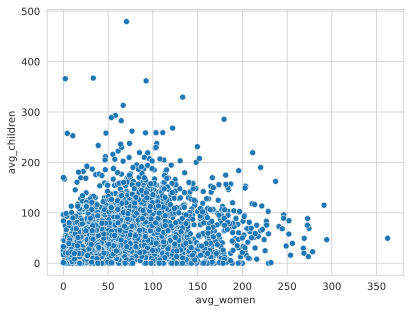

In [ ]:
sns.scatterplot(data=df_slavery, x="avg_women", y="avg_children");

**Line plots are appropriate when time is on the x-axis**, otherwise you might be more interested in a different plot. As an example, we can get unique time values for this data (by-year) by grouping by the `year_of_arrival`.

In [ ]:
# filter out data with no gender/adolescence data
mask = ~df_slavery['gender_excluded']

# group by year to get a summary for each year 
df_yearly_slaves = df_slavery[mask].groupby('year_of_arrival') \
                             [['avg_women', 'avg_children', 'avg_men']].sum()

In [ ]:
df_yearly_slaves.head()

,avg_women,avg_children,avg_men
year_of_arrival,,,
1613,99.6,67.1,226.4
1619,66.3,67.8,179.8
1620,156.8,227.2,464.7
1628,46.1,159.3,67.1
1636,81.6,130.6,134.7


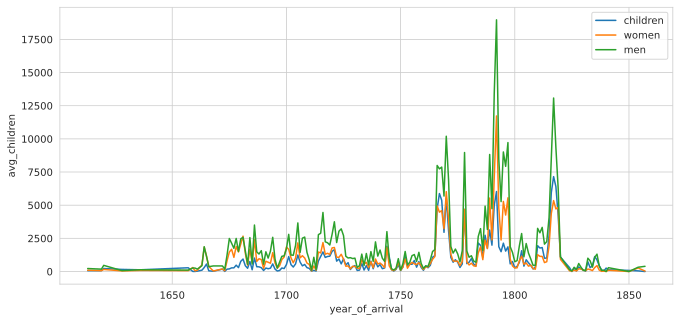

In [ ]:
# we can plot multiple layers
plt.figure(figsize=(11, 5))

sns.lineplot(data=df_yearly_slaves['avg_children'], label='children')
sns.lineplot(data=df_yearly_slaves['avg_women'], label='women')
sns.lineplot(data=df_yearly_slaves['avg_men'], label='men');

## Estimation

In some cases, we might not want to group the data into individual (aggregated) unique years, but we might want to show a "review" of all the data *in* the plot.

In [ ]:
# capture the decade, the time at a lower fidelity
df_slavery['decade_of_arrival'] = df_slavery['year_of_arrival'].round(-1)

In [ ]:
df_slavery[['year_of_arrival', 'decade_of_arrival']].head()

,year_of_arrival,decade_of_arrival
0,1520,1520
1,1525,1520
2,1526,1530
3,1526,1530
4,1526,1530


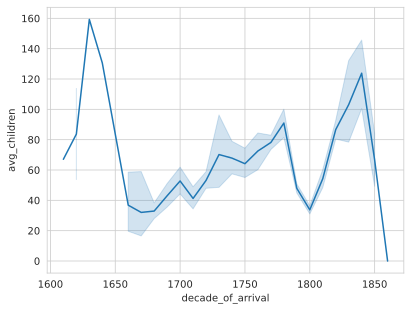

In [ ]:
# the shaded region is a "confidence interval", of sorts
sns.lineplot(data=df_slavery, x='decade_of_arrival', y='avg_children');

Typically, the `hue` argument adjusts color (and sometimes another visual attribute) based on the value of a variable.

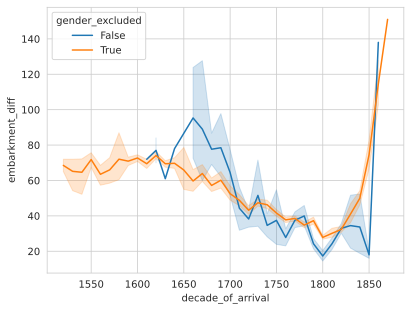

In [ ]:
# the shaded region is a "confidence interval", of sorts
sns.lineplot(data=df_slavery, x='decade_of_arrival', y='embarkment_diff',
             hue='gender_excluded');

Some plots like `lmplot` have a `col=` argument to plot multiple subplots based on the value of a categorical column

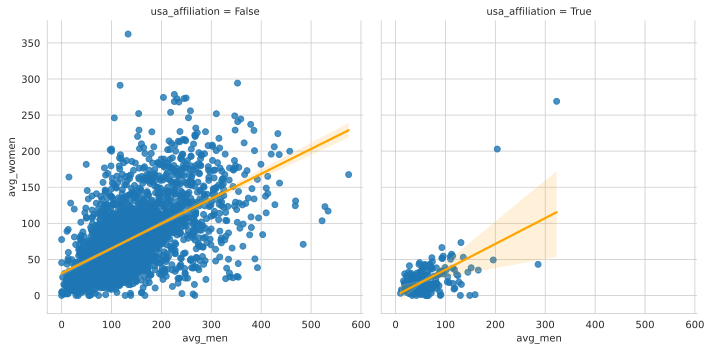

In [ ]:
# "linear model" plot: a scatter plot with a regression line estimation
sns.lmplot(data=df_slavery, x='avg_men', y='avg_women', col='usa_affiliation',
           line_kws={'color': 'orange'});

## Distributional Representations

Each bar in a histogram represents a partition of data, where the left/right sides of the rectangles reflect the lower/upper bounds on the x-axis. For each partition, the height of the bar represents how much data falls within that partition. Portions of the plot with higher rectangles have more data, and vice versa.

Note: we can adjust the matplotlib attributes of a plot using dot notation.

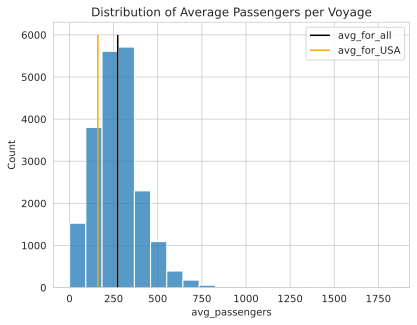

In [ ]:
a = df_slavery['avg_passengers']

g = sns.histplot(a, bins=20)

# we could add to this plot, by comparing the USA to other nations
avg_for_usa = df_slavery[df_slavery['usa_affiliation']]['avg_passengers'].mean()
g.vlines(x=a.mean(), ymin=0, ymax=6000, color='black', label='avg_for_all')
g.vlines(x=avg_for_usa, ymin=0, ymax=6000, color='orange', label='avg_for_USA')
g.legend()
g.set_title("Distribution of Average Passengers per Voyage");

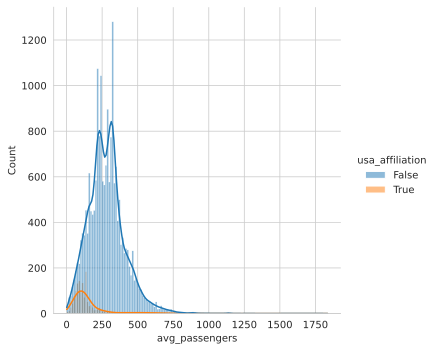

In [ ]:
# displot is very similar to histplot
sns.displot(data=df_slavery, x="avg_passengers", hue="usa_affiliation", 
            kde=True);

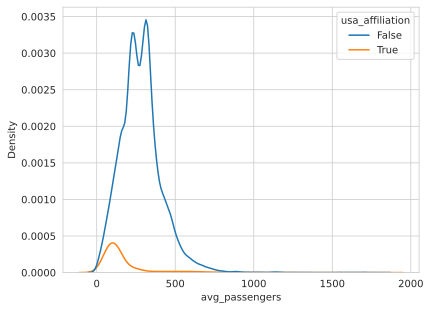

In [ ]:
# alternate plot using kernel density estimation
sns.kdeplot(data=df_slavery, x="avg_passengers", hue="usa_affiliation");

See [here](https://en.wikipedia.org/wiki/Kernel_density_estimation) for more on K.D.E.

## Plots for Categorical Data

In general, we should never plot more data than what we can perceive. So, we want to avoid overplotting (i.e., overlapping visual elements), but also we want to avoid situations where the plot has too many different colors, shapes, or patterns.

For this reason, we'll bring back our `usa_affiliation` as a mask which we might want to use.

In [ ]:
mask = df_slavery['usa_affiliation']
df_plot = df_slavery[mask]

**`catplot`**

The `catplot` function allows us to plot different categorical plots. One example of these is the *[swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html)*. This is a helpful plot if the data is small, and you want to see where points lie based on a categorical attribute. Note, with the swarm plot, points are only jittered along the categorical axis, so their location on the numeric axis is accurate.

In [ ]:
# popular places of landing, with over 50 instances
places_of_landing = df_plot['place_of_landing'].value_counts()
popular_places = places_of_landing[places_of_landing > 50].index

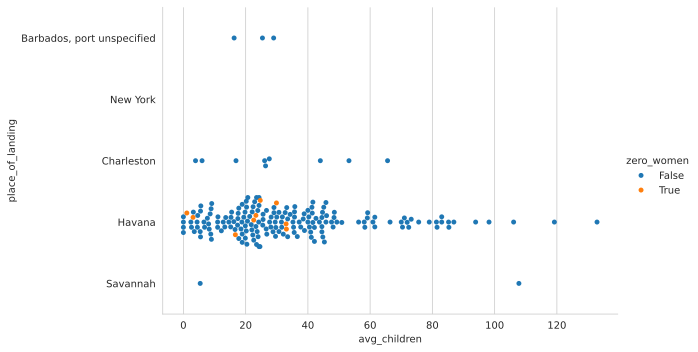

In [ ]:
df_plot = df_plot[df_plot['place_of_landing'].isin(popular_places)]

sns.catplot(data=df_plot, kind="swarm", height=5, aspect=1.8,
            x="avg_children", y="place_of_landing", hue='zero_women');

**`boxplot`**

A boxplot is often a more efficient way to plot this sort of data:

- The bottom of the box represents the 25th percentile, and the top represents the 75th percentile. So, the 50% of the data lies "within" the box. This is the Interquartile Range, or IQR.
- The whiskers extend from the box to the maximum or minimum value, but no further than $1.5 \times \text{IQR}$ from the top or bottom of the box, respectively.
- Any points past the whiskers are typically defined as outliers.
- The horizontal line within the box represents the median value for the data. The lower half of the data lies below this value, and upper 50% above it.

\* *Note: Traditionally, the boxplot is place in the vertical orientation, but in Seaborn, you can swap `x` and `y` to transpose the orientation.*

> The "violin plot" (`sns.violinplot`) is sometimes a prettier alternative to the box plot, but usually it tends to over-complicate the visualization.

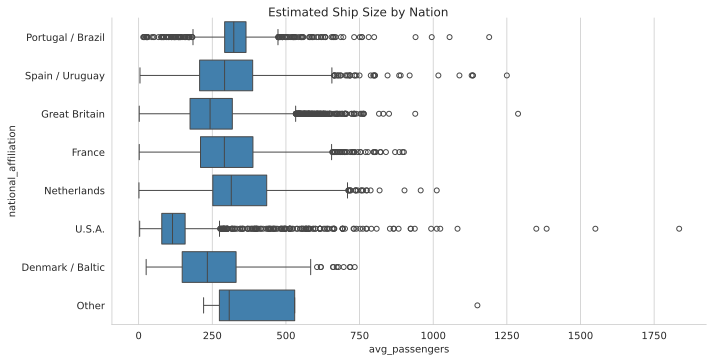

In [ ]:
g = sns.catplot(data=df_slavery, kind="box", aspect=2,
                x="avg_passengers", y="national_affiliation", color='#3182bd')

# Seaborn figures apply titles differently
g.figure.suptitle("Estimated Ship Size by Nation", y=1);

**`barplot`**

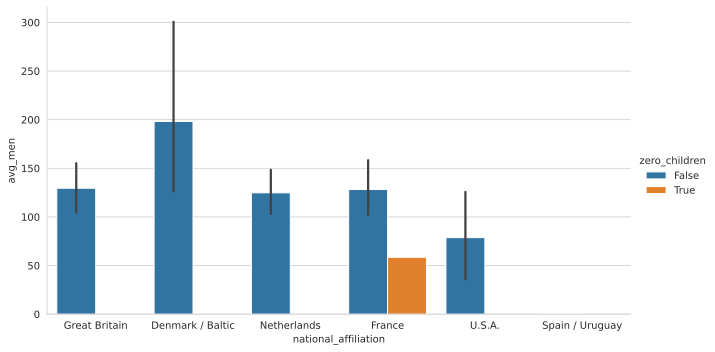

In [ ]:
mask = df_slavery['resistance_label'] == 'Slave insurrection'

# excluded rows without the data we want
df_plot = df_slavery[mask].dropna(subset=['avg_men', 'national_affiliation'])

sns.catplot(data=df_plot, kind='bar', x='national_affiliation', y='avg_men',
            estimator='mean', hue='zero_children', aspect=1.8);

**Multi-Variate Views**

When we want to see more than two variable on a seaborn Figure, we can use multi-variate views. These kinds of plots will become more useful when we start working with linear regression. 

In [ ]:
df_slavery.columns

Index(['year_of_arrival', 'national_affiliation', 'place_of_purchase',
       'place_of_landing', 'percent_women', 'percent_children', 'percent_men',
       'total_embarked', 'total_disembarked', 'resistance_label',
       'vessel_name', 'captain_name', 'voyage_id', 'embarkment_diff',
       'avg_passengers', 'avg_children', 'avg_women', 'avg_men',
       'avg_children_within_nation', 'avg_children_deviation',
       'gender_excluded', 'usa_affiliation', 'zero_children', 'zero_men',
       'zero_women', 'avg_children_qcut', 'avg_passengers_cut',
       'decade_of_arrival'],
      dtype='object')

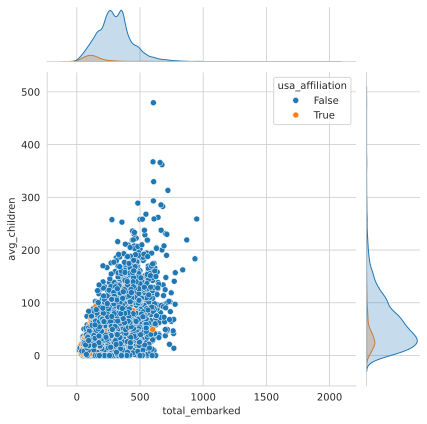

In [ ]:
sns.jointplot(data=df_slavery, x="total_embarked", y="avg_children",
              hue="usa_affiliation");

In [ ]:
cols = ['year_of_arrival', 'avg_passengers', 'avg_women', 'usa_affiliation']
# this usually helps with overlapping data points
df_plot = df_slavery[cols].sort_values('usa_affiliation')

# this plot is a bit big
# sns.pairplot(data=df_plot, hue='usa_affiliation');

Frankly, <font color='red'>**with all this data overlapping, we should be using a different plot.**</font>

**subplots**

We can also use `plt.subplots` to plot two different plots in the same figure.

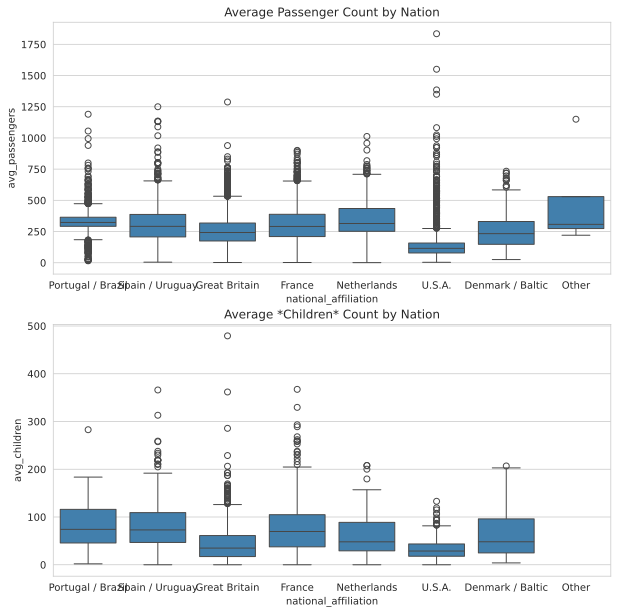

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1)

sns.boxplot(data=df_slavery, y="avg_passengers", x="national_affiliation", color='#3182bd', ax=axes[0])
sns.boxplot(data=df_slavery, y="avg_children", x="national_affiliation", color='#3182bd', ax=axes[1])

axes[0].set_title("Average Passenger Count by Nation")
axes[1].set_title("Average *Children* Count by Nation")

fig.set_size_inches(10, 10)

## Save Plots

You can save your plot as a PNG using `savefig`. 

In [ ]:
fig.savefig('./passenger_children_count_by_nation.png',
            bbox_inches="tight")  # this usually helps to keep labels from getting cut off

## Further Resources

- **[pandas cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)**
- [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html), pandas Official Documentation
- ["Data Manipulation with pandas"](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html), *Python Data Science*, Jake VanderPlas

**Rule of Thumb:** pandas is *incredibly* robust. If you can imagine a data manipulation in your head, there is probably a way to do it in a few lines of clean pandas code. Use Google and Stack Overflow wisely, and use pandas efficiently.


---
# Explore

Test your understanding of this week's content with the following explorations.

*Note: unless otherwise noted, **explorations are completely optional and will not be reviewed.***

## instructions

For each of the following, **use visualizations** to address the question. Write a short "takeaway" message for each plot, and share any caveats. Also, for each plot, try to get creative with themes, colors, formatting, titles, etc.

## exploration 1

How did the (apparently known) sales of children slaves change over time? Are these changes consistent across national interests?


## exploration 2

What is going on with the difference between `total_embarked` and `total_disembarked`?

> Hint: A "tidy" DataFrame is one where each row represents a **single and unique** observation (or entity), and each column represents a particular attribute of each observation. So, for example, if we think of a "voyage" as a trip which starts in some place, makes a few stops, and then ends, then any stops should be (somehow) represented in a single row. Alternatively, each stop could be its own row, etc. ... Consider the tidiness of this data.

## exploration 3

Take a look at the *vessel_name* column. Is it true that every row has a unique vessel name? Are there any duplicates? If so, what do these duplicates have in common? You should be able to answer this question using only the topics discussed above.